In [1]:
import nltk 

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
# to grab messages as a list of messages
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')
#tab separated values file or tsv first column is label and second column is message.
#Instead of just parsing tsv manually using python we can use pandas.

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
import pandas as pd

In [9]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages['length']=messages['message'].apply(len)

In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

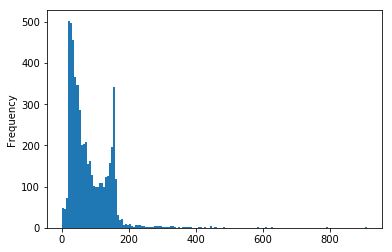

In [16]:
messages['length'].plot.hist(bins=150)
# bimodal behaviour

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length']==910]['message'].iloc[0]
#iloc[0] to print entire string

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BADF119B0>,
      dtype=object)

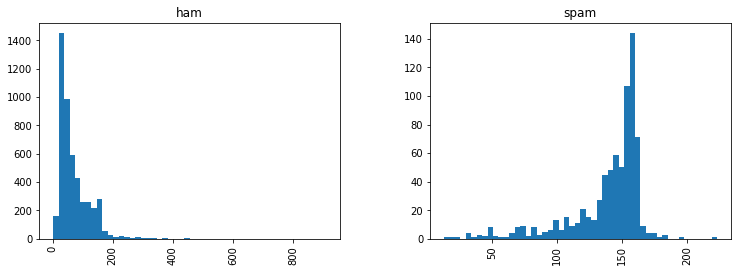

In [19]:
messages.hist(column='length',by='label',bins=50,figsize=(12,4))

In [20]:
#main issue is our data is in text format or strings, the classification
#algorithms we have learned so far need numerical features vectors.

# Text PreProcessing

In [21]:
#bag of word approach to convert a corpus of strings(sequence of characters)
#to a vector format. Stopwords='the','or',...

In [22]:
import string

In [23]:
mess = 'Sample message! Notice: it has punctuation.'

In [24]:
nopunc=[c for c in mess if c not in string.punctuation]

In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
nopunc=''.join(nopunc)

In [28]:
nopunc

'Sample message Notice it has punctuation'

In [29]:
x=['a' ,'b' ,'c' ,'d']

In [30]:
'_'.join(x)

'a_b_c_d'

In [31]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [32]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [34]:
#tokenize
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return list of clean words
    """
    nopunc=[c for c in mess if c not in string.punctuation]
    nopunc=''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [35]:
#vectorization.
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [36]:
#stemming another similar process.
#for eg running,ran,run becomes run in stemming.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
#making matrix.
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [39]:
print(len(bow_transformer.vocabulary_))

11425


In [40]:
mess4=messages['message'][3]

In [41]:
print(mess4)

U dun say so early hor... U c already then say...


In [42]:
#we can use transform method on bow_transform object to transform the entire dataframe of message.
bow4=bow_transformer.transform([mess4])

In [43]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [44]:
bow4.shape

(1, 11425)

In [45]:
bow_transformer.get_feature_names()[9554]

'say'

In [46]:
messages_bow=bow_transformer.transform(messages['message'])

In [47]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [48]:
# amount of non-zero occurances.
messages_bow.nnz

50548

In [49]:
sparsity=(100.0*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('sparcity: {}'.format(sparsity))

sparcity: 0.07940295412668218


In [50]:
#Tf Idf
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [52]:
tfidf4 = tfidf_transformer.transform(bow4)

In [53]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [54]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [55]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
#we finally have messages as numerical vector.

In [56]:
#many ways of data preprocessing and vectorize and these steps involve feature engineering and building a pipeline.

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [59]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [60]:
messages['label'][3]

'ham'

In [61]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [62]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [63]:
from sklearn.cross_validation import train_test_split

C:\Users\Mkiit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [65]:
#another way to train  msg_train, use scikit learn data pipeline feature.
from sklearn.pipeline import Pipeline

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [68]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000022BADF55D08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [69]:
predictions=pipeline.predict(msg_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1447
       spam       0.98      0.75      0.85       225

avg / total       0.96      0.96      0.96      1672



# Project

In [72]:
import pandas as pd

In [73]:
yelp=pd.read_csv('yelp.csv')

In [74]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [75]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [76]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [77]:
yelp['text length']=yelp['text'].apply(len)

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

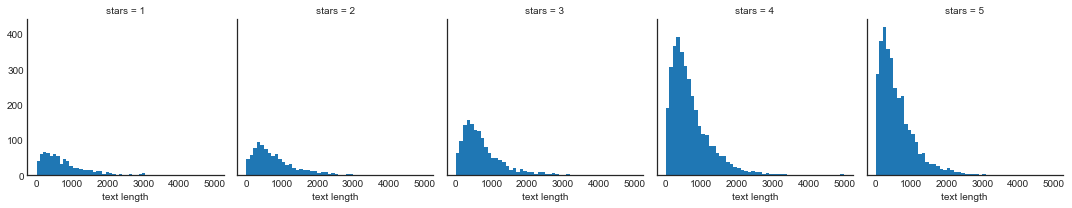

In [79]:
g = sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist,'text length',bins=50)

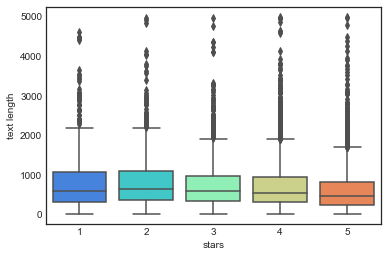

In [80]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

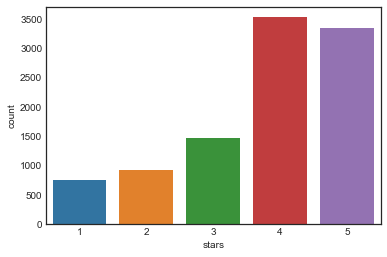

In [81]:
sns.countplot(yelp['stars'])

In [88]:
yelp.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [90]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


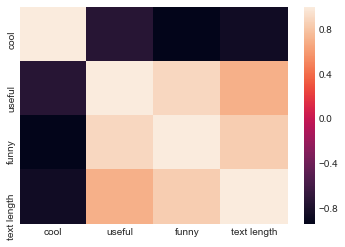

In [91]:
sns.heatmap(yelp.groupby('stars').mean().corr())

In [96]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [97]:
X=yelp_class['text']
y=yelp_class['stars']

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
cv=CountVectorizer()

In [100]:
X=cv.fit_transform(X)

In [101]:
from sklearn.cross_validation import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
nb=MultinomialNB()

In [108]:
model = nb.fit(X_train,y_train)

In [109]:
predictions = nb.predict(X_test)

In [110]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [115]:
from sklearn.feature_extraction.text import TfidfTransformer

In [116]:
from sklearn.pipeline import Pipeline

In [134]:
pipe = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [135]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [136]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [137]:
predictions= pipe.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix, classification_report

In [139]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Mkiit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
